In [3]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import re
import dateutil.parser 
import datetime

def getTransfersFile(league,season):
    filename = league + "_" + str(season)
    result = pd.read_csv("../data/transfers/" + filename + ".csv")
    result['filename'] = filename
    return result

def getPersonalFile(league,season):
    filename = league + "_" + str(season)
    result = pd.read_csv("../data/personal/" + filename + ".csv")
    result['filename'] = filename
    return result

def mvFix(mv):
    if 'Mill.' in mv:
        return float(mv.split('Mill.')[0].replace(',','.'))*1000000
    elif "Th." in mv:
        return float(mv.split('Th.')[0].replace(',','.'))*1000
    elif "-" in mv or "?"==mv:
        return np.nan
    else:
        return int('0' + ''.join([d for d in mv.replace(',','.') if d in '1234567890.']))

def feeValue(mv):
    try:
        mv = str(mv)
        r= mvFix(mv.replace('Loan fee:',''))
        return r
    except Exception as e:
        print mv, e
        return -666

def heightFix(h):
    r = float('0' + ''.join([d for d in str(h).replace(',','.') if d in '1234567890.']))
    return r if r > 0 else np.nan

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

In [5]:
transfers = pd.concat([getTransfersFile(league,season) for league in ['GB1','ES1','L1','IT1','FR1','PO1','NL1','TR1','RU1','GB2','BE1','MLS1'] for season in range(2001,2016)],ignore_index=True)
transfers = transfers[pd.notnull(transfers['playerName'])]
transfers['date'] = transfers['date'].apply(dateutil.parser.parse)
transfers=transfers[['id','playerName','date','season','fromCountry','fromTeamId','fromTeamName','toCountry','toTeamId','toTeamName','mv','fee']]
transfers['mv'] = transfers['mv'].apply(mvFix)
transfers['feeValue'] = transfers['fee'].apply(feeValue)
transfers=transfers.drop_duplicates()
transfers['isLoan']=(transfers['fee']=='End of loan')|(transfers['fee']=='Loan ')
transfers

,id,playerName,date,season,fromCountry,fromTeamId,fromTeamName,toCountry,toTeamId,toTeamName,mv,fee,feeValue,isLoan
0,4096,Jacob Burns,2014-07-01,14/15,Australia,970,Perth Glory,NaN,123,End of career,300000,-,NaN,False
1,4096,Jacob Burns,2009-07-01,09/10,Romania,10442,Unirea Urziceni,Australia,970,Perth Glory,400000,Free transfer,0,False
2,4096,Jacob Burns,2008-02-01,07/08,Poland,422,Wisla Kraków,Romania,10442,Unirea Urziceni,450000,Free transfer,0,False
3,4096,Jacob Burns,2006-02-01,05/06,England,349,Barnsley FC,Poland,422,Wisla Kraków,400000,100 Th. €,100000,False
4,4096,Jacob Burns,2004-01-01,03/04,England,515,Unattached,NaN,349,Barnsley FC,NaN,-,NaN,False
5,4096,Jacob Burns,2003-07-01,03/04,England,399,Leeds,NaN,515,Unattached,NaN,-,NaN,False
6,4096,Jacob Burns,2000-07-01,00/01,Australia,2500,Parra. Power,England,399,Leeds,NaN,375 Th. €,375000,False
7,4096,Jacob Burns,1999-07-01,99/00,Australia,6045,Sydney United,Australia,2500,Parra. Power,NaN,?,NaN,False
8,4097,Kevin Lisbie,2016-01-11,15/16,England,2804,Barnet,NaN,515,Unattached,150000,-,NaN,False
9,4097,Kevin Lisbie,2015-07-01,15/16,England,1150,Leyton Orient,England,2804,Barnet,150000,Free transfer,0,False


In [2]:
players = pd.concat([getPersonalFile(league,season) for league in ['GB1','ES1','L1','IT1','FR1','PO1','NL1','TR1','RU1','GB2','BE1','MLS1'] for season in range(2001,2016)],ignore_index=True)
players = players[pd.notnull(players['Display name'])]
players = players.drop_duplicates('id') #27081
c = ['id','Display name', 'Name in home country','Date of birth','Place of birth','Country of birth',
        'Age','Height','Nationality','Position','Foot','National team id', 'Intl caps/goals','Player\'s agent','Player\'s agent id', 
        'Current club', 'Current club id','In the team since', 'Contract until','on loan from', 'on loan from club id', 'Contract there until']
players = players.drop(['error','birthDate'],axis=1,errors='ignore')
players = players[(c + [x for x in players.columns if not x in c])]
players['Date of birth']=players['Date of birth'].apply(lambda d: dateutil.parser.parse(str(d).replace(' Happy Birthday','')) if pd.notnull(d) else np.nan)
players['Height']=players['Height'].apply(heightFix)
players.index = players['id']

NameError: name 'players' is not defined

In [1]:
players.groupby('Country of birth').count()['id'].sort_values(ascending=False)
players.groupby('Place of birth').count()['id'].sort_values(ascending=False)[:10].plot.pie(figsize=(6,6))
#players[players['Country of birth']=="Belize"]

#players[(players['Country of birth'] == 'Yugoslavia (Republic)') | (players['Country of birth'] == 'Jugoslawien (SFR)')].groupby('Country of birth')['Date of birth'].describe()
#players[(players['Country of birth'] == 'Zaire') | (players['Country of birth'].str.contains('Congo'))].groupby('Country of birth')['Date of birth'].describe()

NameError: name 'players' is not defined

In [13]:
players.groupby('Display name').count()['id'].sort_values(ascending=False)
players[players['Display name']=='Stevica Ristic'].groupby('filename').count()
#[:100].plot.bar(figsize=(20,5))

,id,Display name,Name in home country,Date of birth,Place of birth,Country of birth,Age,Height,Nationality,Position,...,Glove,Outfitter,Shoe model,Shoe size,day of death,facebook,instagram,name,twitter,website
filename,,,,,,,,,,,,,,,,,,,,,
PO1_2010,50,50,50,50,50,50,50,50,50,50,...,0,0,0,0,0,0,0,50,0,50
RU1_2010,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,0,1


In [123]:
players.columns

Index([u'2nd club', u'2nd club id', u'Age', u'Complete name',
       u'Contract option', u'Contract there until', u'Contract until',
       u'Country of birth', u'Current club', u'Current club id',
       u'Date of birth', u'Date of last contract extension',
       u'Detailed position', u'Display name', u'Foot', u'Glove', u'Height',
       u'In the team since', u'Intl caps/goals', u'Name in home country',
       u'National team id', u'Nationality', u'Outfitter', u'Place of birth',
       u'Player's agent', u'Player's agent id', u'Position', u'Shoe model',
       u'Shoe size', u'birthDate', u'day of death', u'error', u'facebook',
       u'filename', u'id', u'instagram', u'name', u'on loan from',
       u'on loan from club id', u'twitter', u'website'],
      dtype='object')

In [74]:
players[(pd.isnull(players['Display name']))].groupby('error').count()

,2nd club,2nd club id,Age,Complete name,Contract option,Contract there until,Contract until,Country of birth,Current club,Current club id,...,day of death,facebook,filename,id,instagram,name,on loan from,on loan from club id,twitter,website
error,,,,,,,,,,,,,,,,,,,,,
'NoneType' object has no attribute 'find_all',0,0,0,0,0,0,0,0,0,0,...,0,0,80,80,0,79,0,0,0,0


In [51]:
transfers

,id,playerName,date,season,fromCountry,fromTeamId,fromTeamName,toCountry,toTeamId,toTeamName,mv,fee,isLoan
0,4096,Jacob Burns,2014-07-01,14/15,Australia,970,Perth Glory,NaN,123,End of career,300000,-,False
1,4096,Jacob Burns,2009-07-01,09/10,Romania,10442,Unirea Urziceni,Australia,970,Perth Glory,400000,Free transfer,False
2,4096,Jacob Burns,2008-02-01,07/08,Poland,422,Wisla Kraków,Romania,10442,Unirea Urziceni,450000,Free transfer,False
3,4096,Jacob Burns,2006-02-01,05/06,England,349,Barnsley FC,Poland,422,Wisla Kraków,400000,100 Th. €,False
4,4096,Jacob Burns,2004-01-01,03/04,England,515,Unattached,NaN,349,Barnsley FC,NaN,-,False
5,4096,Jacob Burns,2003-07-01,03/04,England,399,Leeds,NaN,515,Unattached,NaN,-,False
6,4096,Jacob Burns,2000-07-01,00/01,Australia,2500,Parra. Power,England,399,Leeds,NaN,375 Th. €,False
7,4096,Jacob Burns,1999-07-01,99/00,Australia,6045,Sydney United,Australia,2500,Parra. Power,NaN,?,False
8,4097,Kevin Lisbie,2016-01-11,15/16,England,2804,Barnet,NaN,515,Unattached,150000,-,False
9,4097,Kevin Lisbie,2015-07-01,15/16,England,1150,Leyton Orient,England,2804,Barnet,150000,Free transfer,False


In [ ]:
transfers[pd.isnull(transfers['playerName'])]

In [162]:
grouped = transfers.groupby(['id','date'])['playerName'].count()
grouped[grouped==2].count()

194

In [234]:
int('0' + ''.join([d for d in 'asds121' if d in '1234567890.']))

121

In [235]:
transfers[['id','fee','playerName']][~((transfers['fee'].str.contains('Th.'))|(transfers['fee'].str.contains('Mill.')))].drop_duplicates(subset='fee')
transfers[['id','fee','playerName']][~((transfers['fee'].str.contains('Th.'))|(transfers['fee'].str.contains('Mill.')))].groupby('fee').count().sort_values('id',ascending=False)

#transfers[['mvfixed','mv']].describe()

,id,playerName
fee,,
Free transfer,58402,58402
-,45428,45428
?,37588,37588
End of loan,29989,29989
Loan,28254,28254
draft,608,608
Swap deal,604,604
gratuito,331,331
trade,226,226


ValueError: invalid literal for int() with base 10: '50000 \xe2\x82\xac '

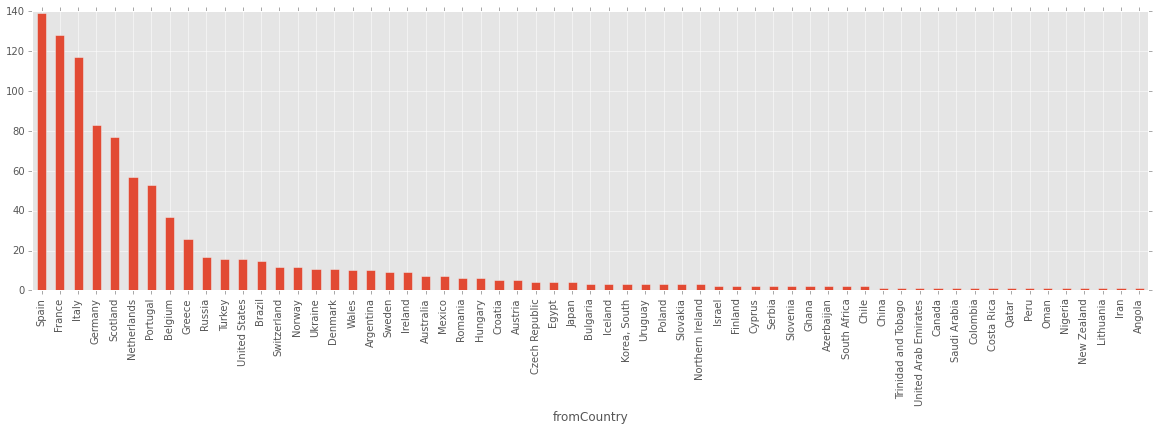

In [172]:
transfers[(transfers['toCountry'] == 'England') & (transfers['date'] >= datetime.date(2010,1,1))].drop_duplicates(subset=['id'],keep='last').groupby('fromCountry')['id'].count().drop('England').sort_values(ascending=False).plot.bar(figsize=(20,5))

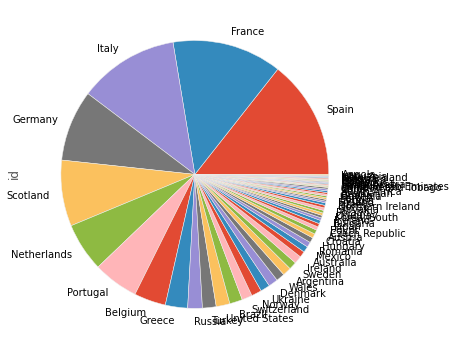

In [177]:
transfers[(transfers['toCountry'] == 'England') & (transfers['date'] >= datetime.date(2010,1,1))].drop_duplicates(subset=['id'],keep='last').groupby('fromCountry')['id'].count().drop('England').sort_values(ascending=False).plot.pie(figsize=(6,6))

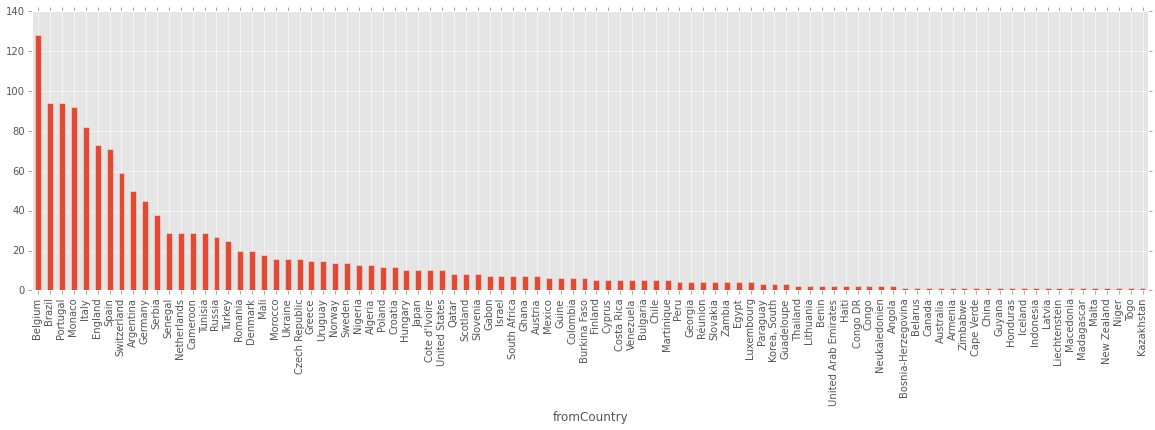

In [240]:
transfers[(transfers['toCountry'] == 'France') & (transfers['date'] >= datetime.date(1980,1,1))].drop_duplicates(subset=['id'],keep='last').groupby('fromCountry')['id'].count().drop('France').sort_values(ascending=False).plot.bar(figsize=(20,5))

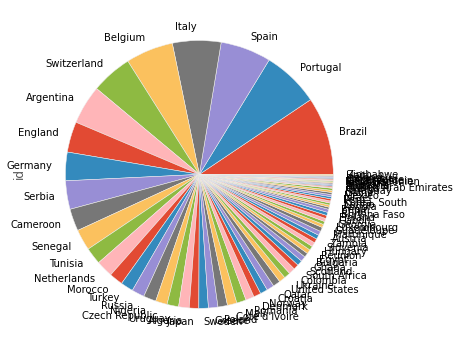

In [209]:
transfers[(transfers['toCountry'] == 'France') & (transfers['date'] < datetime.date(2010,1,1))].drop_duplicates(subset=['id'],keep='last').groupby('fromCountry')['id'].count().drop(['France','Monaco']).sort_values(ascending=False).plot.pie(figsize=(6,6))

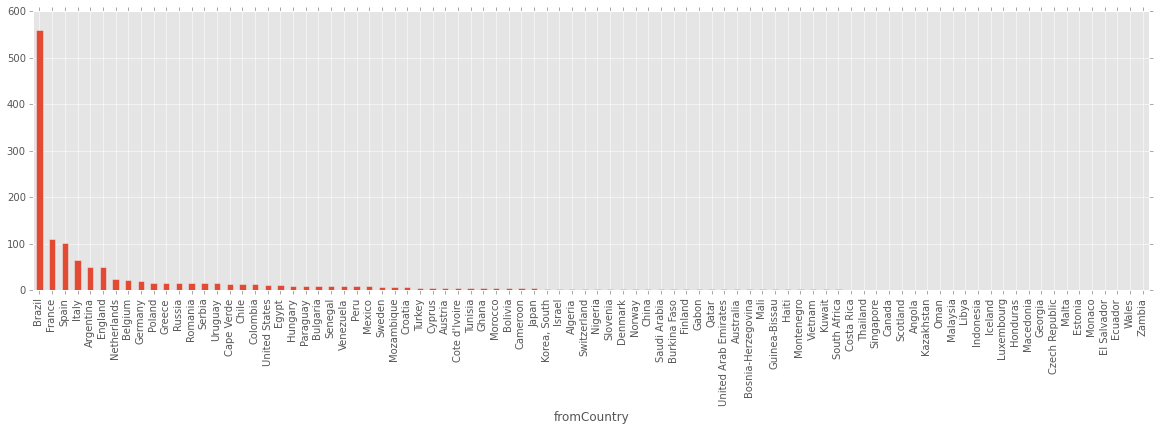

In [185]:
transfers[(transfers['toCountry'] == 'Portugal') & (transfers['date'] >= datetime.date(1900,1,1))].drop_duplicates(subset=['id'],keep='last').groupby('fromCountry')['id'].count().drop('Portugal').sort_values(ascending=False).plot.bar(figsize=(20,5))

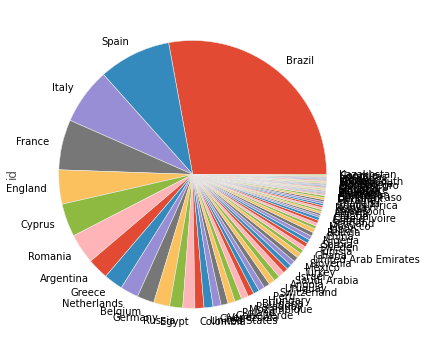

In [205]:
transfers[(transfers['toCountry'] == 'Portugal') & (transfers['date'] >= datetime.date(2010,1,1))].drop_duplicates(subset=['id'],keep='last').groupby('fromCountry')['id'].count().drop('Portugal').sort_values(ascending=False).plot.pie(figsize=(6,6))

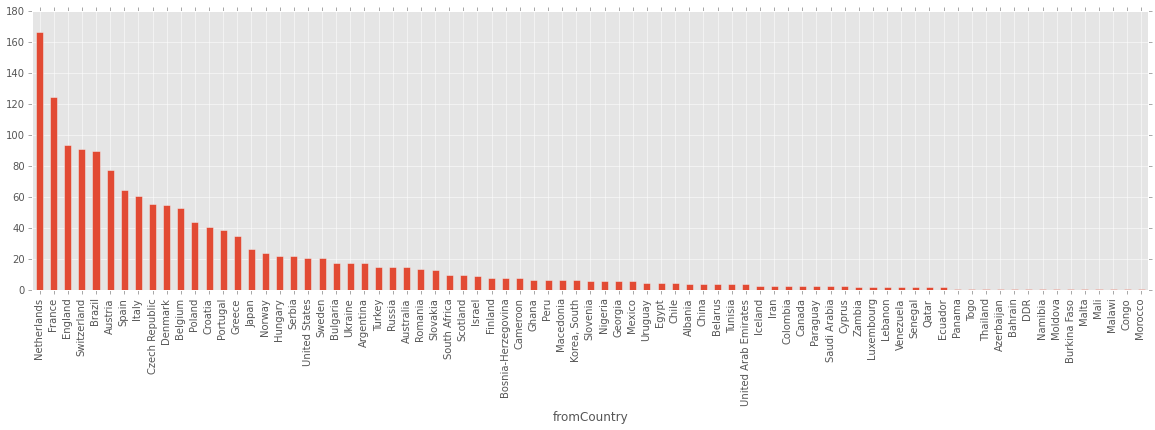

In [193]:
transfers[(transfers['toCountry'] == 'Germany') & (transfers['date'] < datetime.date(2020,1,1))].drop_duplicates(subset=['id'],keep='last').groupby('fromCountry')['id'].count().drop('Germany').sort_values(ascending=False).plot.bar(figsize=(20,5))

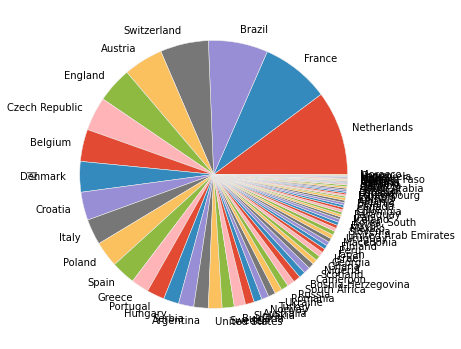

In [202]:
transfers[(transfers['toCountry'] == 'Germany') & (transfers['date'] < datetime.date(2010,1,1))].drop_duplicates(subset=['id'],keep='last').groupby('fromCountry')['id'].count().drop('Germany').sort_values(ascending=False).plot.pie(figsize=(6,6))

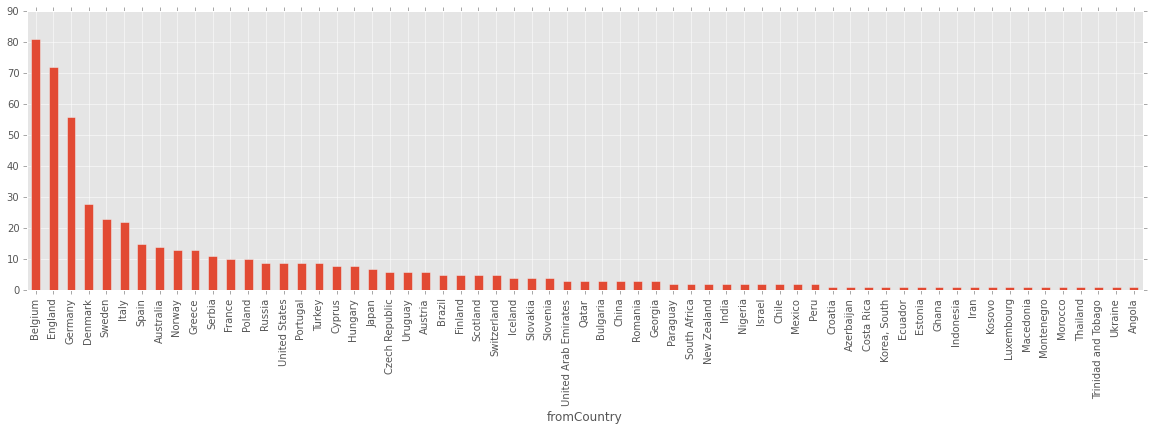

In [197]:
transfers[(transfers['toCountry'] == 'Netherlands') & (transfers['date'] >= datetime.date(2010,1,1))].drop_duplicates(subset=['id'],keep='last').groupby('fromCountry')['id'].count().drop('Netherlands').sort_values(ascending=False).plot.bar(figsize=(20,5))

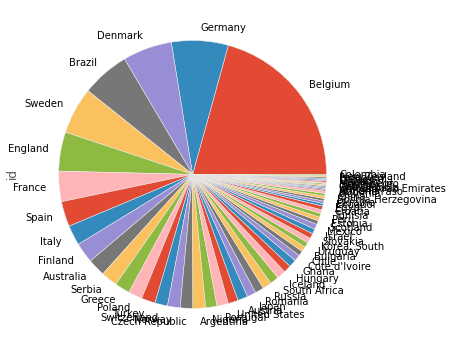

In [199]:
transfers[(transfers['toCountry'] == 'Netherlands') & (transfers['date'] < datetime.date(2010,1,1))].drop_duplicates(subset=['id'],keep='last').groupby('fromCountry')['id'].count().drop('Netherlands').sort_values(ascending=False).plot.pie(figsize=(6,6))

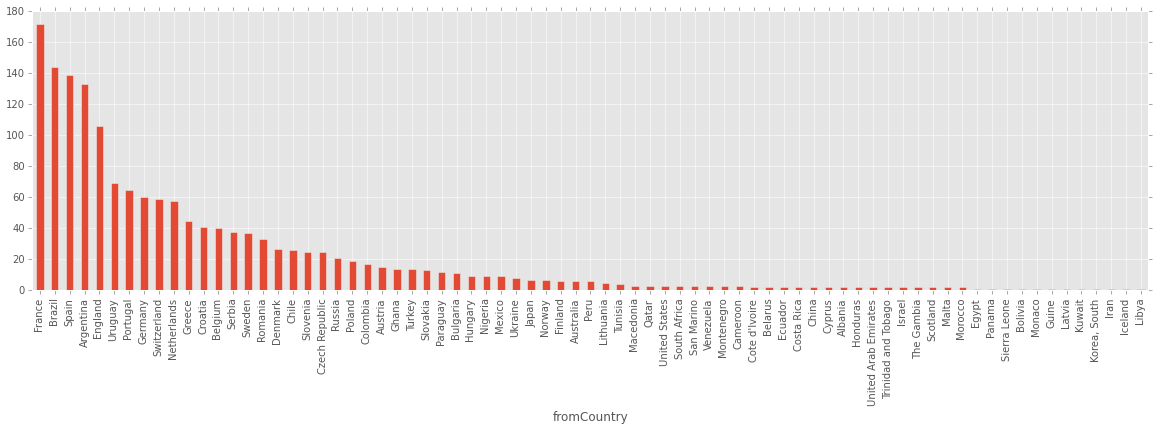

In [268]:
transfers[(transfers['toCountry'] == 'Italy') & (transfers['date'] < datetime.date(2020,1,1))].drop_duplicates(subset=['id'],keep='last').groupby('fromCountry')['id'].count().drop('Italy').sort_values(ascending=False).plot.bar(figsize=(20,5))

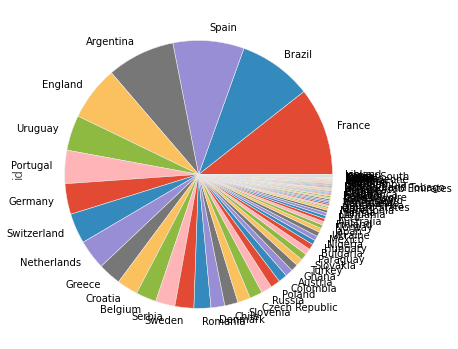

In [271]:
transfers[(transfers['toCountry'] == 'Italy') & (transfers['date'] < datetime.date(2020,1,1))].drop_duplicates(subset=['id'],keep='last').groupby('fromCountry')['id'].count().drop('Italy').sort_values(ascending=False).plot.pie(figsize=(6,6))

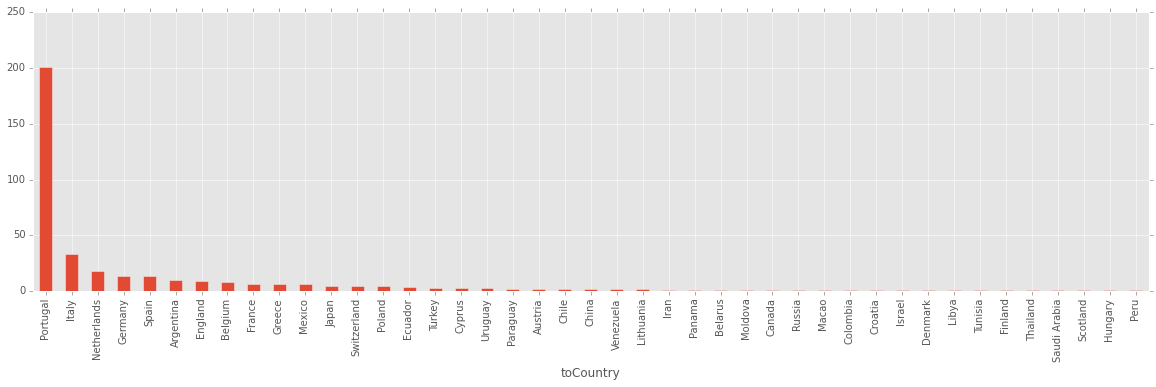

In [40]:
transfers[(transfers['fromCountry'] == 'Brazil') & (transfers['date'] < datetime.date(2020,1,1))].drop_duplicates(subset=['id'],keep='last').groupby('toCountry')['id'].count().drop('Brazil').sort_values(ascending=False).plot.bar(figsize=(20,5))

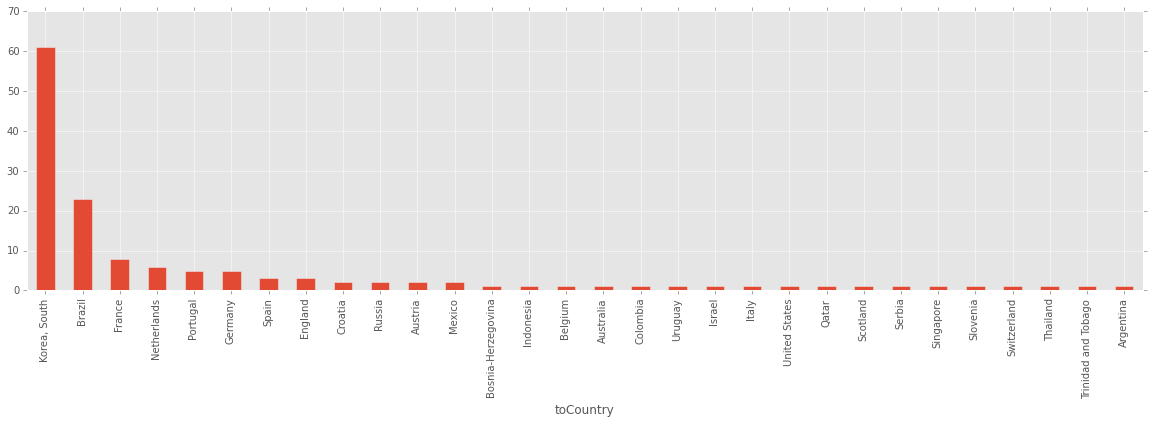

In [41]:
transfers[(transfers['fromCountry'] == 'Japan') & (transfers['date'] < datetime.date(2020,1,1))].drop_duplicates(subset=['id'],keep='last').groupby('toCountry')['id'].count().drop('Japan').sort_values(ascending=False).plot.bar(figsize=(20,5))

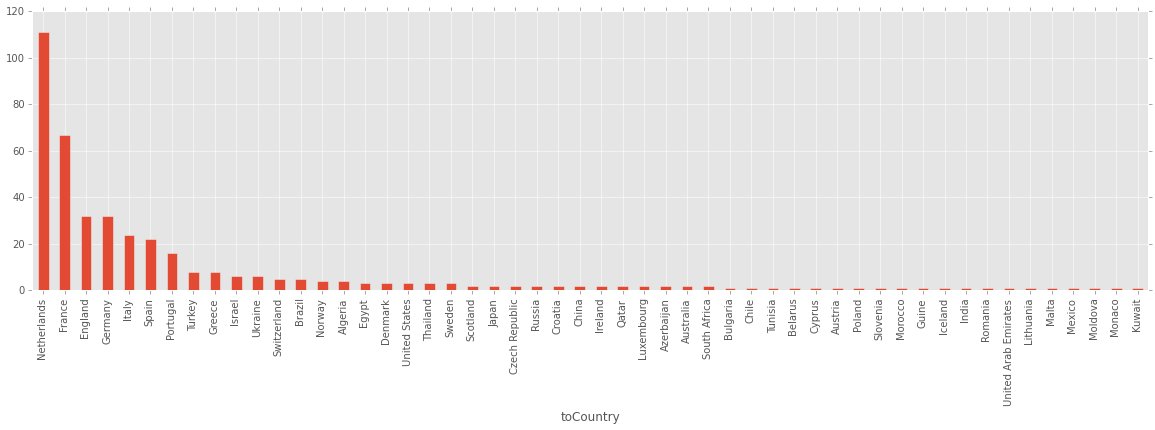

In [43]:
transfers[(transfers['fromCountry'] == 'Belgium') & (transfers['date'] < datetime.date(2020,1,1))].drop_duplicates(subset=['id'],keep='last').groupby('toCountry')['id'].count().drop('Belgium').sort_values(ascending=False).plot.bar(figsize=(20,5))

count    17184.000000
mean         7.156250
std          3.606072
min          1.000000
25%          4.750000
50%          7.000000
75%          9.000000
max         27.000000
Name: playerName, dtype: float64

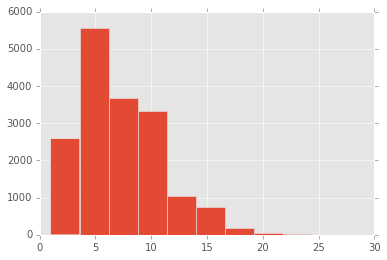

In [36]:
transfers.groupby('id')['playerName'].count().hist()
transfers.groupby('id')['playerName'].count().describe()


count    9352.000000
mean        2.162318
std         1.518207
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: playerName, dtype: float64

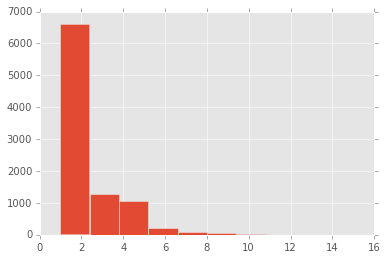

In [37]:
loans.groupby('id')['playerName'].count().hist()
loans.groupby('id')['playerName'].count().describe()


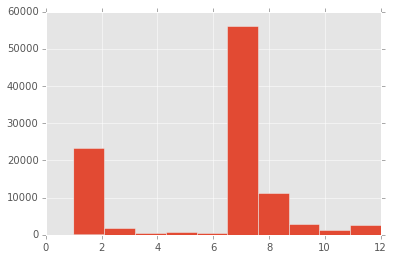

In [35]:
transfers['date'][transfers['date']>datetime.date(2002,8,1)].apply(lambda d: d.month).hist()
#.groupby('date').

In [214]:
transfers[(transfers['toCountry'] == 'France') &(transfers['fromCountry'] == 'England')].sort_values('date')

,id,playerName,date,season,fromCountry,fromTeamId,fromTeamName,toCountry,toTeamId,toTeamName,mv,fee
12493,14026,Michael Hughes,1992-07-01,92/93,England,281,Manchester City,France,667,R. Strasbourg,-,500 Th. €
117497,6979,William Prunier,1996-03-01,95/96,England,985,Manchester Utd.,France,40,G. Bordeaux,-,End of loan
1273,13248,Chris Makin,1996-07-01,96/97,England,1078,Oldham Athletic,France,244,Marseille,-,Free transfer
373,4226,Fabrizio Ravanelli,1997-07-01,97/98,England,641,Middlesbrough,France,244,Marseille,-,"7,40 Mill. €"
115113,5316,Sébastien Pérez,1999-01-01,98/99,England,164,Blackburn,France,595,SC Bastia,-,Loan
61818,3574,Valérien Ismaël,1999-01-01,98/99,England,873,Crystal Palace,France,826,Lens,-,"1,80 Mill. €"
109722,155753,Jean-Guy Wallemme,1999-01-01,98/99,England,990,Coventry City,France,750,FC Sochaux,-,?
113475,104068,Mickaël Madar,1999-01-01,98/99,England,29,Everton,France,583,Paris SG,-,?
5397,4015,Louis Saha,1999-05-31,98/99,England,762,Newcastle,France,347,FC Metz,-,End of loan
111479,5382,Jean-Claude Darcheville,1999-06-30,98/99,England,703,Nottm Forest,France,273,Rennes,-,End of loan


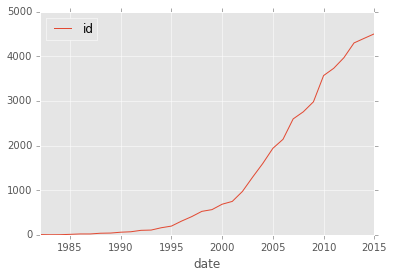

In [29]:
t=DataFrame(transfers[transfers['toCountry']!=transfers['fromCountry']]['date'].apply(lambda d: d.year))
t["id"]=t.index
t.groupby('date').count().drop([2016,2017]).plot.line()
#t.groupby('date').count()[-10:-2].plot.line()

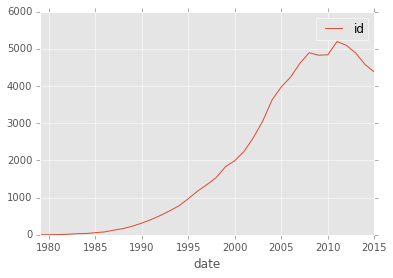

In [30]:
t=DataFrame(transfers[transfers['toCountry']==transfers['fromCountry']]['date'].apply(lambda d: d.year))
t["id"]=t.index
t.groupby('date').count().drop([2016,2017]).plot.line()
#t.groupby('date').count()[-10:-2].plot.line()

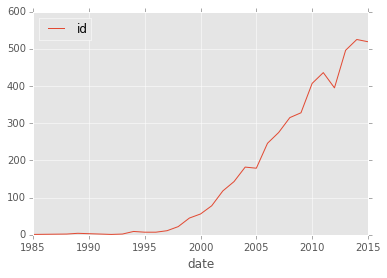

In [31]:
t=DataFrame(loans[loans['toCountry']!=loans['fromCountry']]['date'].apply(lambda d: d.year))
t["id"]=t.index
t.groupby('date').count().drop([2016,2017]).plot.line()
#t.groupby('date').count()[-10:-2].plot.line()

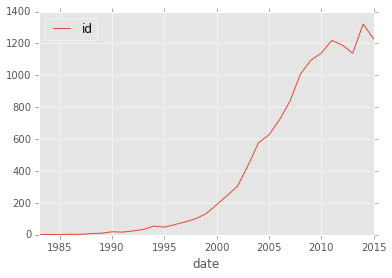

In [32]:
t=DataFrame(loans[loans['toCountry']==loans['fromCountry']]['date'].apply(lambda d: d.year))
t["id"]=t.index
t.groupby('date').count().drop([2016,2017]).plot.line()
#t.groupby('date').count()[-10:-2].plot.line()